## US MEDICAL INSURANCE COST USING REGRESSION

### **Introduction**

This project aims to analyze a dataset of US medical insurance costs using regression analysis to predict prices. The dataset contains key features such as age, sex, BMI, number of children, smoking status, region, and the charges (insurance costs). Through data exploration and preprocessing, categorical variables will be encoded, and numerical features will be standardized to ensure accurate modeling. Using regression analysis, the goal is to determine the relationship between these variables and predict insurance costs. The analysis will also identify which factors have the most significant impact on pricing, providing valuable insights into cost prediction and factors driving insurance expenses.



#### **LETS IMPORT LIBRARIES AND LOAD THE DATASET**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
ins = pd.read_csv('insurance.csv')
ins.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### **Exploratory Data Analysis**

In the **exploratory data analysis (EDA)** phase of a project, we focus on understanding the dataset through the following steps:

1. **Data Overview**:  
   Review the dataset structure, including the shape (number of rows and columns), data types, and summary statistics.

2. **Missing Values**:  
   Identify and handle any missing or incomplete data that could affect analysis.

3. **Univariate Analysis**:  
   Analyze individual variables using descriptive statistics (mean, median, mode, etc.) and visualizations like histograms or boxplots to understand distributions and detect outliers.

4. **Bivariate/Multivariate Analysis**:  
   Explore relationships between variables using correlation matrices, scatter plots, and pair plots, to uncover patterns or dependencies.

5. **Outlier Detection**:  
   Identify outliers that may skew results, typically using visual tools like boxplots or statistical methods.

The goal of EDA is to gain a deep understanding of the data, uncover patterns, and guide further analysis.

In [5]:
ins.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
ins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
#lets see each unique value in the categorical data
for column in ins.select_dtypes(include=['object', 'category']).columns:
       print(f"{column}: {ins[column].unique()}")

sex: ['female' 'male']
smoker: ['yes' 'no']
region: ['southwest' 'southeast' 'northwest' 'northeast']


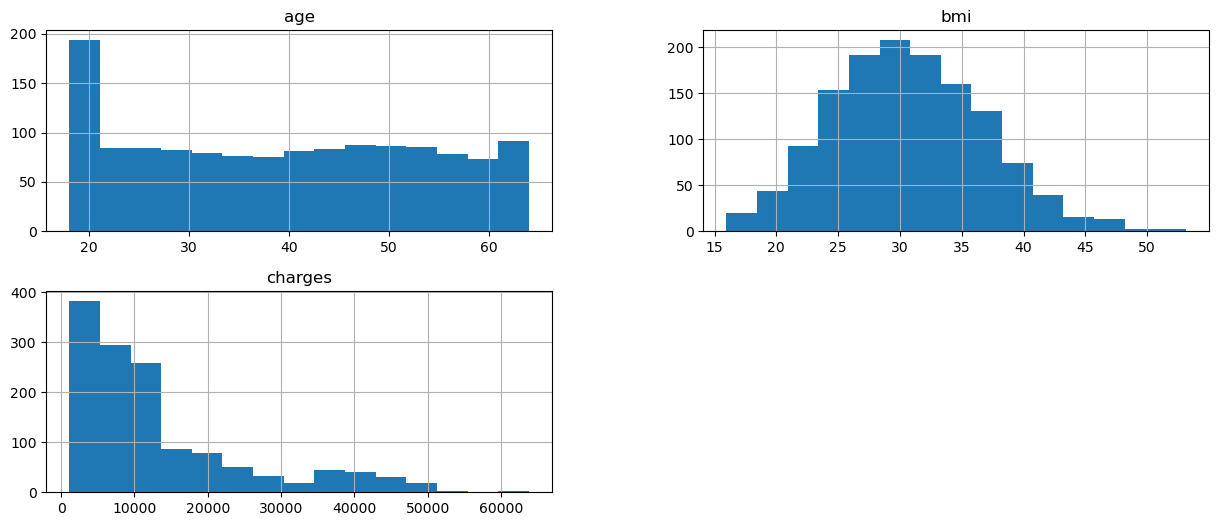

In [8]:
#from the head we can  see our numerical variable lets visualize them using a plot

numerical_features = ['age', 'bmi', 'charges']
ins[numerical_features].hist(bins=15, figsize=(15, 6), layout=(2, 2))
plt.show()

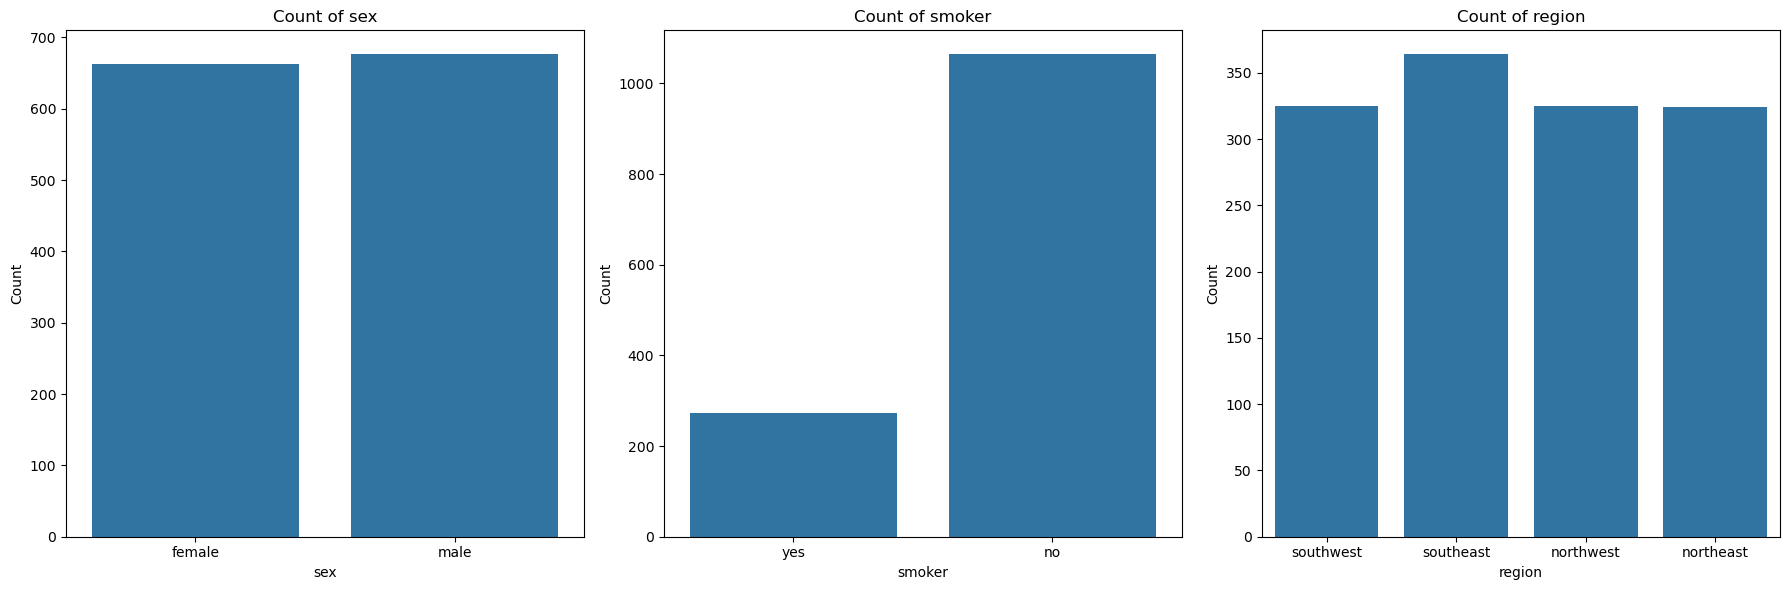

In [9]:
#lets see Count plots for categorical features
categorical_features = ['sex', 'smoker', 'region']
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
for col, ax in zip(categorical_features, axes):
    sns.countplot(data=ins, x=col, ax=ax)
    ax.set_title(f'Count of {col}')
    ax.set_xlabel(f'{col}')
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()


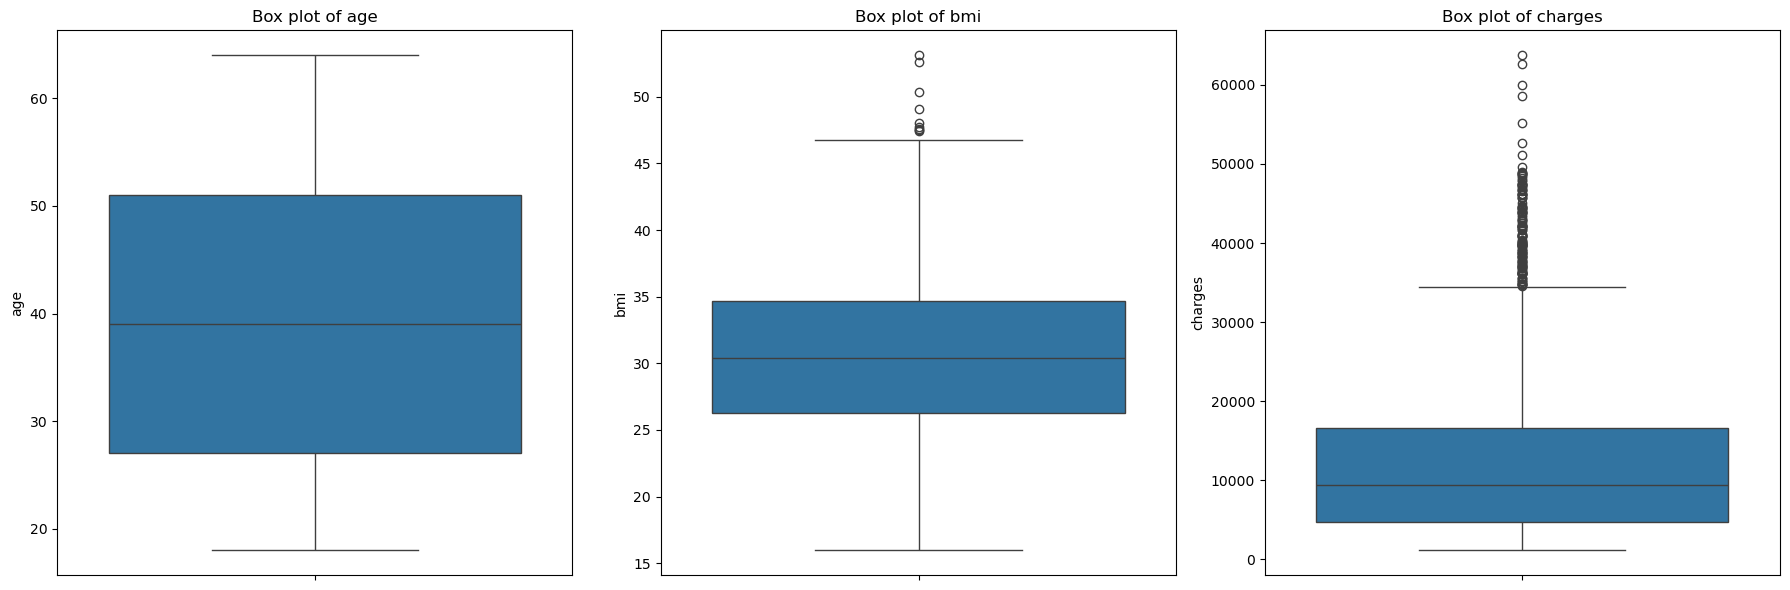

In [10]:
# Box plots to show distributions and outliers
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for col, ax in zip(numerical_features, axes):
    sns.boxplot(data=ins, y=col, ax=ax)
    ax.set_title(f'Box plot of {col}')

plt.tight_layout()
plt.show()



## UNIVARIATE STATISTICS 
Univariate statistics involves analyzing a single variable to understand its distribution and key characteristics. It includes:

Descriptive statistics: Measures such as mean, median, mode, range, variance, and standard deviation provide a summary of the data.

Frequency distribution: Shows how often each value or range of values occurs in the dataset.

Visualizations: Histograms, boxplots, and bar charts are common tools to visualize the distribution and spot patterns or outliers.

Univariate analysis helps you understand the basic properties of a variable before moving to more complex analyses.

#### BMI STATISTICS

Descriptive Statistics for BMI:
count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

Frequency Distribution of BMI:
(15.922, 19.677]     30
(19.677, 23.394]    127
(23.394, 27.111]    234
(27.111, 30.828]    319
(30.828, 34.545]    288
(34.545, 38.262]    195
(38.262, 41.979]     96
(41.979, 45.696]     32
(45.696, 49.413]     14
(49.413, 53.13]       3
Name: count, dtype: int64


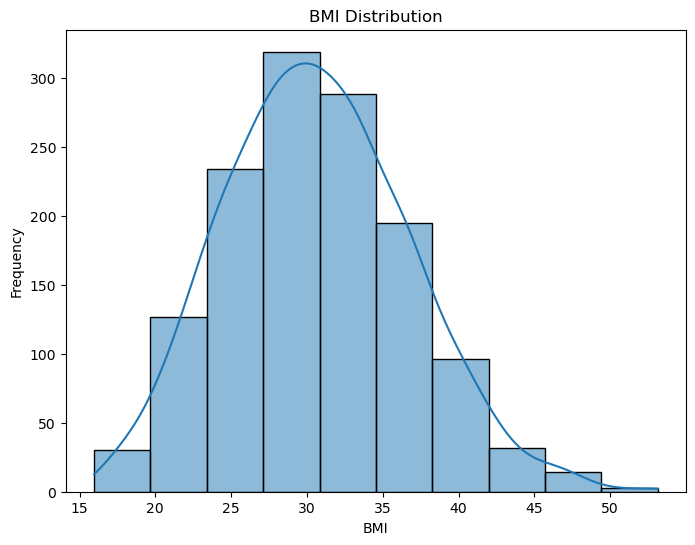

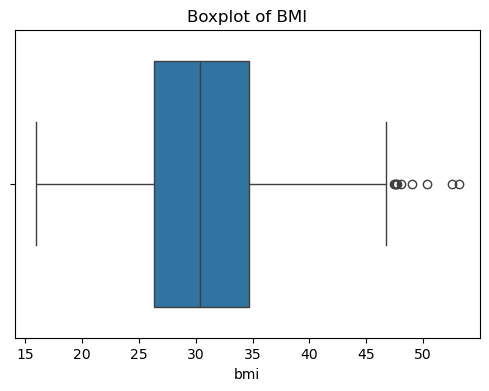

In [11]:
 #Descriptive statistics for BMI
bmi_stats = ins['bmi'].describe()
print("Descriptive Statistics for BMI:")
print(bmi_stats)

#Frequency distribution (bins)
print("\nFrequency Distribution of BMI:")
bmi_hist = ins['bmi'].value_counts(bins=10).sort_index()
print(bmi_hist)

#Visualizing BMI distribution using a histogram
plt.figure(figsize=(8,6))
sns.histplot(ins['bmi'], bins=10, kde=True)
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

#Boxplot to check for outliers in BMI
plt.figure(figsize=(6,4))
sns.boxplot(x=ins['bmi'])
plt.title('Boxplot of BMI')
plt.show()

## CHARGES STATISTICS

Descriptive Statistics for charges:
count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

Frequency Distribution of charges:
(1059.224, 7386.729]      536
(7386.729, 13651.585]     398
(13651.585, 19916.44]     129
(19916.44, 26181.296]      86
(26181.296, 32446.151]     35
(32446.151, 38711.006]     59
(38711.006, 44975.862]     57
(44975.862, 51240.717]     32
(51240.717, 57505.573]      2
(57505.573, 63770.428]      4
Name: count, dtype: int64


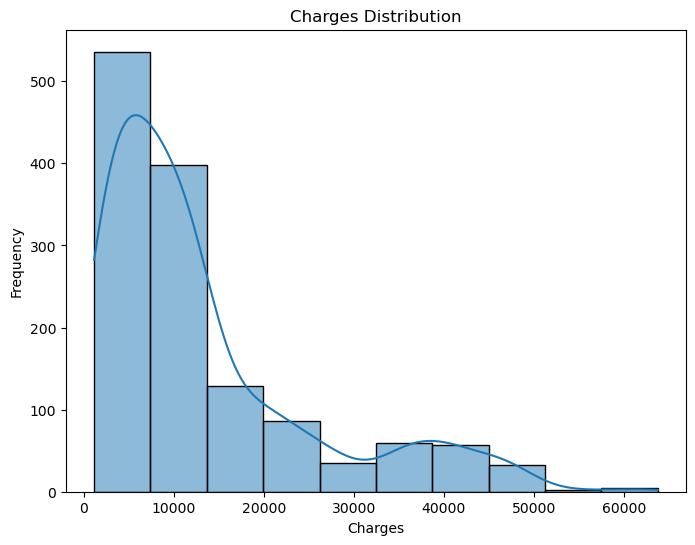

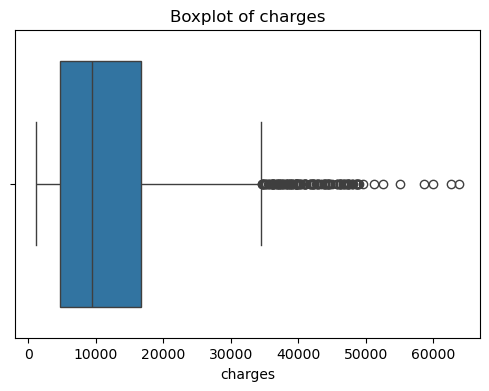

In [12]:
# 1. Descriptive statistics for charges
charges_stats = ins['charges'].describe()
print("Descriptive Statistics for charges:")
print(charges_stats)

# 2. Frequency distribution (bins)
print("\nFrequency Distribution of charges:")
charges_hist = ins['charges'].value_counts(bins=10).sort_index()
print(charges_hist)

# 3. Visualizing charges distribution using a histogram
plt.figure(figsize=(8,6))
sns.histplot(ins['charges'], bins=10, kde=True)
plt.title('Charges Distribution')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()

# 4. Boxplot to check for outliers in charges
plt.figure(figsize=(6,4))
sns.boxplot(x=ins['charges'])
plt.title('Boxplot of charges')
plt.show()

### **BI-VARIATE STATISTICS**

**Bivariate statistics** involves analyzing the relationship between two variables. It helps determine how one variable affects or correlates with another. Key methods include:

1. **Correlation**:  
   Measures the strength and direction of a linear relationship between two variables (e.g., Pearson's correlation coefficient).

2. **Scatter Plots**:  
   A graphical representation to visualize the relationship between two variables.

3. **Cross-tabulation (Contingency Table)**:  
   Used for categorical data to show the frequency distribution of variables in a matrix format.

4. **T-tests and ANOVA**:  
   Statistical tests used to compare the means of two or more groups and see if they differ significantly.

Bivariate analysis is essential for understanding associations, dependencies, and potential causal relationships between variables.

#### AGE VS CHARGES (NUMERICAL VARIABLE)

Correlation between age and charges:
               age   charges
age      1.000000  0.299008
charges  0.299008  1.000000


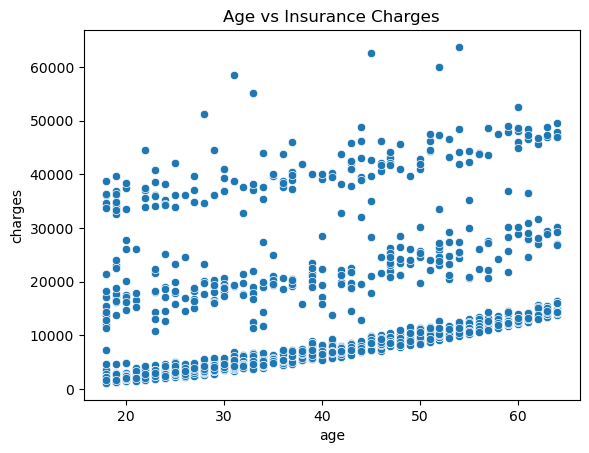

In [13]:
# Calculate correlation
correlation = ins[['age', 'charges']].corr()
print("Correlation between age and charges:\n", correlation)

# Visualize the relationship with a scatter plot
sns.scatterplot(data=ins, x='age', y='charges')
plt.title('Age vs Insurance Charges')
plt.show()

#### SMOKER VS CHARGES (CATEGORICAL VARIABLE)

Smoker vs Charge Category Cross-tabulation:
 charge_category  High  Low
smoker                    
no                395  669
yes               274    0


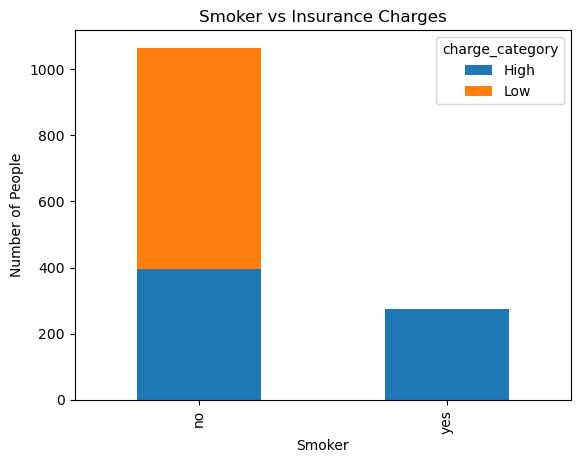

In [14]:
# Categorize charges into high and low based on median
ins['charge_category'] = np.where(ins['charges'] > ins['charges'].median(), 'High', 'Low')

# Cross-tabulation between smoker status and charge category
smoker_vs_charge = pd.crosstab(ins['smoker'], ins['charge_category'])
print("Smoker vs Charge Category Cross-tabulation:\n", smoker_vs_charge)

# Visualize the relationship with a bar plot
smoker_vs_charge.plot(kind='bar', stacked=True)
plt.title('Smoker vs Insurance Charges')
plt.xlabel('Smoker')
plt.ylabel('Number of People')
plt.show()

### MULTIVARIATE STATISTICS
**Multivariate statistics** involves analyzing more than two variables simultaneously to understand relationships, patterns, and interactions among them. It’s commonly used when dealing with complex datasets.

Key techniques include:

1. **Multiple Regression**:  
   Analyzes the relationship between one dependent variable and multiple independent variables (e.g., predicting medical costs based on age, BMI, and smoking status).

2. **Principal Component Analysis (PCA)**:  
   Reduces the dimensionality of large datasets by transforming correlated variables into a smaller set of uncorrelated variables called principal components.

3. **Cluster Analysis**:  
   Groups data into clusters based on similarity across multiple variables, commonly used for segmentation.

4. **Multivariate ANOVA (MANOVA)**:  
   Tests for differences in multiple dependent variables across groups.

Multivariate analysis helps uncover complex relationships and patterns that can't be observed by looking at two variables alone.

#### REGRESSION ANALYSIS

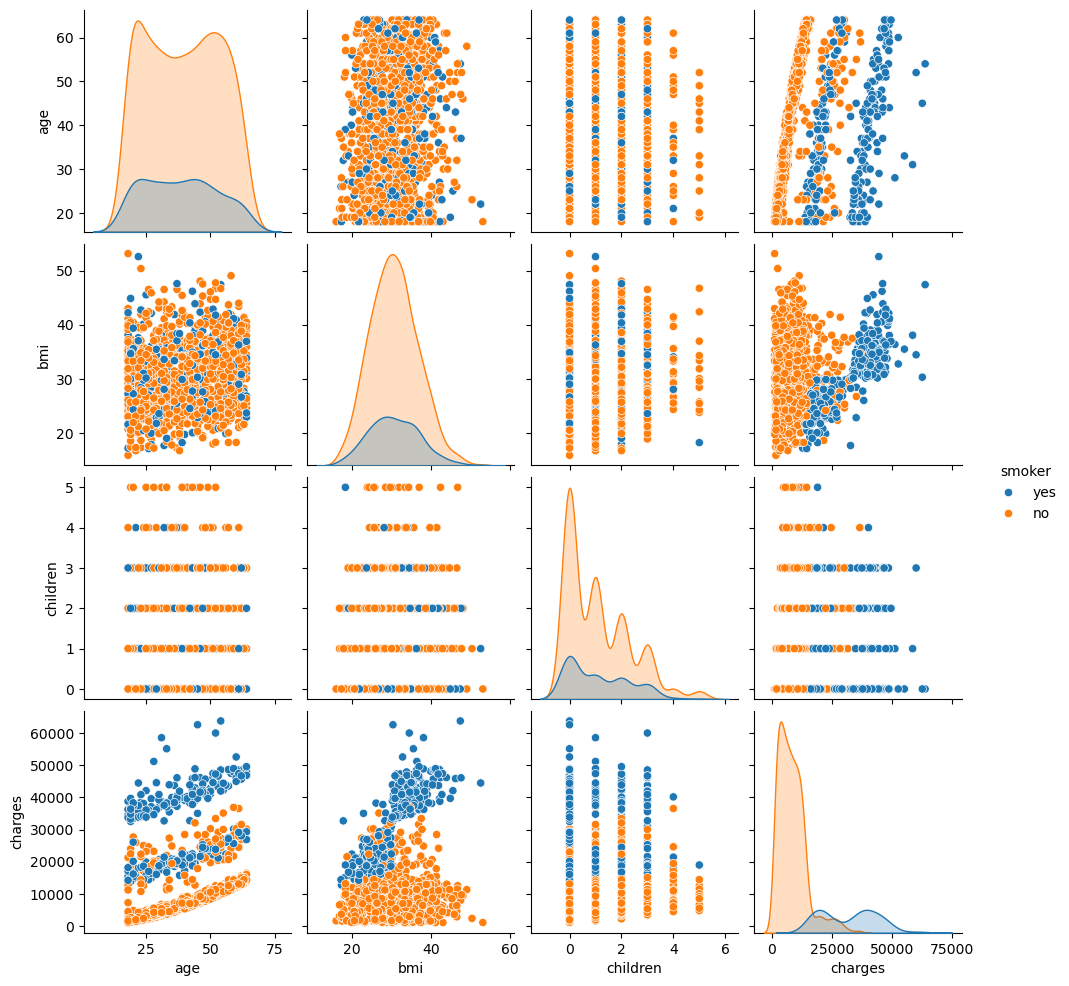

In [15]:
# lets see some  relationships
sns.pairplot(ins, hue='smoker')
plt.show()


In [17]:

### Change columns to categorical
ins.sex = pd.Categorical(ins.sex, categories = ["male", "female"], ordered=False) 
ins.smoker = pd.Categorical(ins.smoker, categories = ["yes", "no"], ordered=False)
ins.region = pd.Categorical(ins.region, categories = ["northeast", "northwest", "southeast", "southwest"], ordered=False)

ins["sex_num"] = ins.sex.cat.codes ## Label encoding - male = 0, female = 1
ins["smoker_num"] = ins.smoker.cat.codes ## Label encoding - yes = 0, no = 1
ins["region_num"] = ins.region.cat.codes ## Label encoding - northeast = 0, northwest = 1, southeast = 2, southwest = 3

#prepare for data for fitting model
ins=ins.drop(columns=['smoker','sex','smoker'])


## Find correlation between variables
ins.head()

,age,bmi,children,region,charges,charge_category,sex_num,smoker_num,region_num
0,19,27.900,0,southwest,16884.92400,High,1,0,3
1,18,33.770,1,southeast,1725.55230,Low,0,1,2
2,28,33.000,3,southeast,4449.46200,Low,0,1,2
3,33,22.705,0,northwest,21984.47061,High,0,1,1
4,32,28.880,0,northwest,3866.85520,Low,0,1,1


In [18]:
ins.head()

,age,bmi,children,region,charges,charge_category,sex_num,smoker_num,region_num
0,19,27.900,0,southwest,16884.92400,High,1,0,3
1,18,33.770,1,southeast,1725.55230,Low,0,1,2
2,28,33.000,3,southeast,4449.46200,Low,0,1,2
3,33,22.705,0,northwest,21984.47061,High,0,1,1
4,32,28.880,0,northwest,3866.85520,Low,0,1,1


In [19]:
ins=ins.drop(columns=['region'])


In [23]:
ins=ins.drop(columns=['charge_category'])


In [24]:
ins.head()

,age,bmi,children,charges,sex_num,smoker_num,region_num
0,19,27.900,0,16884.92400,1,0,3
1,18,33.770,1,1725.55230,0,1,2
2,28,33.000,3,4449.46200,0,1,2
3,33,22.705,0,21984.47061,0,1,1
4,32,28.880,0,3866.85520,0,1,1


In [25]:
ins.corr()

,age,bmi,children,charges,sex_num,smoker_num,region_num
age,1.000000,0.109272,0.042469,0.299008,0.020856,0.025019,0.002127
bmi,0.109272,1.000000,0.012759,0.198341,-0.046371,-0.003750,0.157566
children,0.042469,0.012759,1.000000,0.067998,-0.017163,-0.007673,0.016569
charges,0.299008,0.198341,0.067998,1.000000,-0.057292,-0.787251,-0.006208
sex_num,0.020856,-0.046371,-0.017163,-0.057292,1.000000,0.076185,-0.004588
smoker_num,0.025019,-0.003750,-0.007673,-0.787251,0.076185,1.000000,0.002181
region_num,0.002127,0.157566,0.016569,-0.006208,-0.004588,0.002181,1.000000


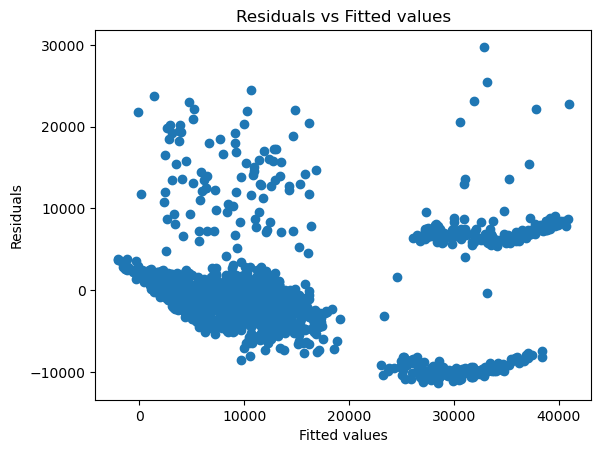

In [26]:
import statsmodels.api as sm

# Assuming 'charges' is the dependent variable
X = ins.drop(columns=['charges'])
y = ins['charges']
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
residuals = model.resid
fitted = model.fittedvalues

plt.scatter(fitted, residuals)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted values')
plt.show()

In [27]:
# Calculate summary statistics
summary_stats = ins.describe().to_dict()
# Extract model summary
model_summary = model.summary2().tables[1].to_dict()

# Organize results
model_results = {
    'coefficients': model.params.to_dict(),
    'p-values': model.pvalues.to_dict(),
    'confidence_intervals': model.conf_int().to_dict(),
    'R-squared': model.rsquared,
    'Adjusted R-squared': model.rsquared_adj
}

# Combine all findings
findings = {
    'summary_statistics': summary_stats,
    'model_results': model_results
}

# Print comprehensive findings
print(findings)
 


{'summary_statistics': {'age': {'count': 1338.0, 'mean': 39.20702541106129, 'std': 14.049960379216172, 'min': 18.0, '25%': 27.0, '50%': 39.0, '75%': 51.0, 'max': 64.0}, 'bmi': {'count': 1338.0, 'mean': 30.66339686098655, 'std': 6.098186911679017, 'min': 15.96, '25%': 26.29625, '50%': 30.4, '75%': 34.69375, 'max': 53.13}, 'children': {'count': 1338.0, 'mean': 1.0949177877429, 'std': 1.2054927397819095, 'min': 0.0, '25%': 0.0, '50%': 1.0, '75%': 2.0, 'max': 5.0}, 'charges': {'count': 1338.0, 'mean': 13270.422265141257, 'std': 12110.011236693994, 'min': 1121.8739, '25%': 4740.28715, '50%': 9382.033, '75%': 16639.912515, 'max': 63770.42801}, 'sex_num': {'count': 1338.0, 'mean': 0.4947683109118087, 'std': 0.500159569284377, 'min': 0.0, '25%': 0.0, '50%': 0.0, '75%': 1.0, 'max': 1.0}, 'smoker_num': {'count': 1338.0, 'mean': 0.7952167414050823, 'std': 0.4036940375456173, 'min': 0.0, '25%': 1.0, '50%': 1.0, '75%': 1.0, 'max': 1.0}, 'region_num': {'count': 1338.0, 'mean': 1.515695067264574, 'st

In [28]:

# Convert coefficients and p-values to DataFrames
coefficients_insurance = pd.DataFrame.from_dict(model_results['coefficients'], orient='index', columns=['Coefficient'])
pvalues_insurance = pd.DataFrame.from_dict(model_results['p-values'], orient='index', columns=['P-value'])

# Combine both DataFrames
results_insurance = coefficients_insurance.join(pvalues_insurance)

# Sort by absolute value of coefficients
results_insurance['Abs Coefficient'] = results_insurance['Coefficient'].abs()
influential_features = results_insurance.sort_values(by='Abs Coefficient', ascending=False)

# Filter for significant features (p-value < 0.05)
significant_features = results_insurance[results_insurance['P-value'] < 0.05]

# Print influential and significant features
print("\nMost influential features based on coefficient magnitude:")
print(influential_features[['Coefficient', 'P-value']])

print("\nSignificant features based on p-values (p < 0.05):")
print(significant_features[['Coefficient', 'P-value']])


Most influential features based on coefficient magnitude:
             Coefficient       P-value
smoker_num -23820.434123  0.000000e+00
const       11873.871222  1.904956e-30
children      479.369394  5.125266e-04
region_num   -353.640017  2.007715e-02
bmi           332.570132  1.471633e-31
age           257.288075  2.848607e-89
sex_num       131.110580  6.936815e-01

Significant features based on p-values (p < 0.05):
             Coefficient       P-value
const       11873.871222  1.904956e-30
age           257.288075  2.848607e-89
bmi           332.570132  1.471633e-31
children      479.369394  5.125266e-04
smoker_num -23820.434123  0.000000e+00
region_num   -353.640017  2.007715e-02


## Conclusion
**Key Findings**
Most Influential Features: The features that have the largest coefficients (positive or negative) are identified, suggesting which variables play the most significant roles in predicting the dependent variable.
Statistically Significant Features: The features with a p-value below 0.05 are flagged as statistically significant. These variables are likely to be reliable predictors, and their effects on the dependent variable are not due to chance.

**Conclusion:**
This analysis enables a data-driven understanding of the relationships between predictors and the dependent variable in the dataset. By focusing on both the magnitude of the coefficients and their statistical significance, the code identifies the most important features, highlighting both those with the largest impact and those that are statistically reliable.

This kind of analysis is critical for making informed, data-driven decisions, whether in business, healthcare, or any other field that uses regression modeling. The ability to separate influential from insignificant features helps to focus on the key drivers of the outcome and to discard or reconsider less relevant predictors.